In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import Functions

In [12]:
df1 = df_restructured

In [13]:
def calc_dist_df(df):
    df_dist = pd.DataFrame()

    prev_lat = df['lat'].shift()
    prev_lon = df['lon'].shift()
    
    df_dist['Distance'] = np.sqrt((prev_lat-df['lat'])**2 + (prev_lon-df['lon'])**2)
        
    return df_dist

In [14]:
df_dist = calc_dist_df(df1)

In [15]:
df_dist.describe()

,Distance
count,52209.000000
mean,0.024092
std,0.226527
min,0.000000
25%,0.001112
50%,0.003031
75%,0.006189
max,20.001111


In [16]:
df_dist.quantile(0.8)

Distance    0.007225
Name: 0.8, dtype: float64

In [17]:
df_dist[df_dist['Distance'] > df_dist['Distance'].quantile(0.8)*50]

,Distance
69,1.005876
70,0.999083
154,1.002543
155,0.999171
233,1.007321
...,...
51998,0.635694
52172,1.000792
52173,0.997039
52193,0.998972


In [18]:
df1_dist = calc_dist_df(df1)

In [19]:
df1_dist.describe()

,Distance
count,52209.000000
mean,0.024092
std,0.226527
min,0.000000
25%,0.001112
50%,0.003031
75%,0.006189
max,20.001111


In [22]:
    # TODO: check correctness of width of bridges
df_bridges = pd.read_excel('BMMS_overview.xlsx')

In [23]:
df_bridges[df_bridges['width'] > 30]

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.40,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693611,90.478833,bcs1
161,N1,231.966,Box Culvert,LRP234a,CORNAIL HAT BOX CULVERT,3.00,A,100621,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,231.966,31.00,1993.0,1.0,Chittagong,Chittagong,Chittagong,Sitakunda,22.369472,91.777278,bcs1
3556,N507,26.486,Box Culvert,LRP027b,.,15.75,A,101833,Hatikamrul-Banpara Road,26.486,39.50,2001.0,3.0,Rajshahi,Pabna,Sirajganj,Sirajgonj-1,24.352222,89.305556,bcs1
3562,N507,29.487,Box Culvert,LRP030b,.,9.20,A,101847,Hatikamrul-Banpara Road,29.487,32.50,2001.0,2.0,Rajshahi,Pabna,Natore,Natore-1,24.344722,89.277778,bcs1
3569,N507,33.837,Box Culvert,LRP034b,.,9.62,A,101867,Hatikamrul-Banpara Road,33.837,33.20,2001.0,2.0,Rajshahi,Pabna,Natore,Natore-1,24.333333,89.238333,bcs1
3583,N507,42.038,Box Culvert,LRP043a,.,5.14,A,101893,Hatikamrul-Banpara Road,42.038,34.55,1999.0,1.0,Rajshahi,Pabna,Natore,Natore-1,24.325278,89.158889,bcs1
4902,R856,10.250,RCC Bridge,LRP010b,.,46.12,A,107658,Noapara (Katakhali)-Fakirhat-Mollahat Road,10.25,100.00,2004.0,3.0,Khulna,Khulna,Bagerhat,Bagerhat-2,22.773778,89.719833,bcs1
13970,Z7456,4.647,Box Culvert,LRP005b,.,1.38,A,107543,Bamundi-Hatboalia-Alamdanga Road,4.647,702.00,1989.0,1.0,Khulna,Jessore,Kushtia,Kushtia,23.856944,88.834167,bcs1
14452,Z7711,4.549,Box Culvert,LRP004a,.,1.95,A,111781,Togra-Zianagar-Balipara-Kalaron-Synashi Road,4.549,40.90,1997.0,1.0,Barisal,Barisal,Pirojpur,Pirojpur,22.471389,89.952222,bcs1
15625,N3,16.288,Box Culvert,LRP016b,BROBARI CULVERT,4.20,B,101423,Dhaka (Banani)-Joydebpur-Mymensingh Road,16.288,30.30,1968.0,1.0,Dhaka,Dhaka,Gazipur,Tongi,23.938944,90.385139,bcs1


In [24]:
# Show all duplicated rows based on 'lon' and 'lat' columns, including all occurrences
duplicated_rows_lon_lat = df_bridges[df_bridges.duplicated(subset=['lon', 'lat'], keep=False)]

# Display the duplicated rows
duplicated_rows_lon_lat

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
9,N1,12.660,PC Girder Bridge,LRP013a,MADAN PUR (R),26.30,A,109841,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,12.66,9.2,2003.0,1.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.691111,90.544889,bcs1
10,N1,12.660,PC Girder Bridge,LRP013a,MADANPUR BRIDGE(L),26.30,A,109838,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,12.66,9.2,2003.0,1.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.691111,90.544889,bcs1
15,N1,18.093,PC Girder Bridge,LRP018c,Sonakhal Bridge(L),25.50,A,119933,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,18.093,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.649754,90.584549,road_interpolate
17,N1,21.184,PC Girder Bridge,LRP021c,Marikhali Bridge(L),86.92,A,119944,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,21.184,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.628467,90.602302,road_interpolate
18,N1,21.184,PC Girder Bridge,LRP021d,Marikhali Bridge(R),89.75,A,119948,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,21.184,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Vitikandi,23.628467,90.602302,road_interpolate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21309,Z7718,38.930,RCC Girder Bridge,LRP038a,Mithakali bridge,19.90,D,119191,Kachua (Pingoria)-Talighati-Herma-Rampal Road,38.93,NaN,NaN,NaN,Khulna,Khulna,Bagerhat,Bagerhat-2,0.000000,0.000000,road_interpolate
21320,Z8004,5.622,Baily with Steel Deck,LRP006a,Koola Bridge,15.20,D,120252,Munshiganj (Hatimara)-Kunderbazr-Srinagar (San...,5.622,NaN,NaN,NaN,Dhaka,Dhaka,Munshiganj,Sreenagar,23.550417,90.429388,road_precise
21344,Z8034,12.418,Baily with Steel Deck,LRP011a,Padarhat bridge,33.43,D,119178,Rahamatpur-Babuganj-Muladi-Hizla Road,12.418,NaN,NaN,NaN,Barisal,Barisal,Barisal,Barisal-1,22.837777,90.376388,road_chainage
21362,Z8203,1.192,Baily with Steel Deck,LRP001a,Hasara Bridge (East),24.00,D,120345,Keraniganj (Sayedpur)-Hashara-Birtara-Singpara...,1.192,NaN,NaN,NaN,Dhaka,Dhaka,Munshiganj,Keraniganj,0.000000,0.000000,road_interpolate


In [3]:
bmms_1, roads_1_tsv, roads_1 = Functions.first_restructure('BMMS_overview.xlsx','_roads.tsv')

[(0, 209, 22.5837497, 23.5896108), (0, 464, 22.4995274, 23.5020278), (0, 701, 22.3390552, 23.3463608), (0, 2378, 22.874916, 21.879416), (0, 2381, 22.8704993, 21.879416), (0, 2453, 22.8029167, 21.8030278), (0, 2982, 91.056, 92.05475), (0, 3051, 91.0703604, 92.0703327), (2, 536, 25.9009444, 23.894833), (2, 605, 23.1011944, 23.9701382), (11, 134, 21.2984719, 22.2992219), (22, 119, 25.8362219, 23.8342497), (22, 128, 22.8439163, 23.8420274), (22, 293, 26.9698327, 23.9695549), (22, 932, 27.126943800000003, 24.1268049), (22, 1673, 23.5214438, 24.5213049), (22, 1769, 22.570749300000003, 24.5701938), (22, 2213, 22.8777493, 24.8776938), (27, 326, 25.4478886, 24.4450274), (31, 9, 90.426416, 91.7758604), (31, 12, 90.4264438, 91.7758604), (38, 500, 23.3018611, 24.2978608), (47, 3698, 23.6245827, 26.6159444), (54, 8, 25.4164722, 24.4188604), (54, 11, 25.4163889, 24.4188604), (54, 14, 25.4146667, 24.4188604), (58, 57, 91.3167493, 90.3102222), (68, 639, 89.93155490000001, 88.9399997), (68, 642, 89.923

C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:106: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lsrp = row[i]
C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:107: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = row[i + 1]
C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

In [11]:
#load tsv file
df_rds = pd.read_csv('_roads.tsv', delimiter='\t', low_memory=False)
df_rds = Functions.restructure_df(df_rds)

C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:106: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lsrp = row[i]
C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:107: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = row[i + 1]
C:\Users\julia\OneDrive\General Documents\Documents\GitHub\advanced_simulation\Functions.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

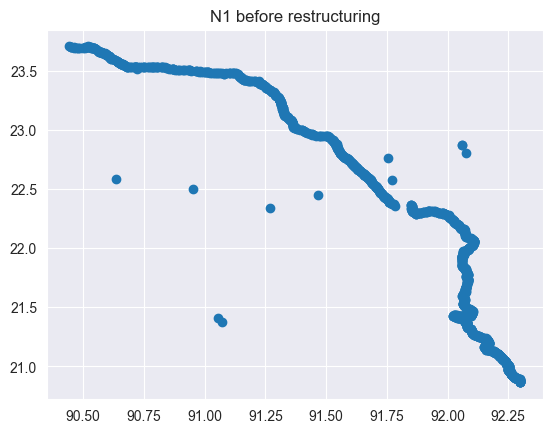

In [12]:
N1 = df_rds[df_rds['road'] == 'N1']
plt.scatter(N1['lon'], N1['lat'])
plt.title('N1 before restructuring')
plt.show()

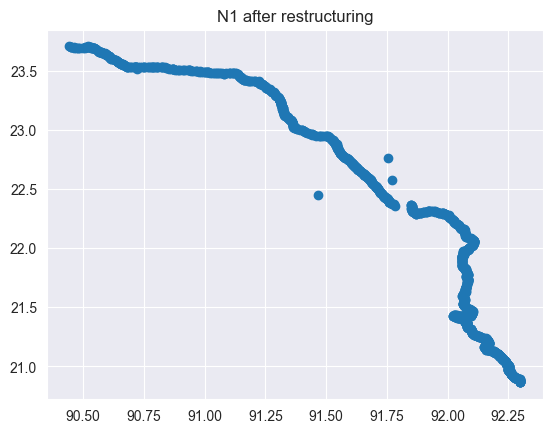

In [9]:
#plot the N1 by longitude and latitude
N1_clean = roads_1[roads_1['road'] == 'N1']
plt.scatter(N1_clean['lon'], N1_clean['lat'])
plt.title('N1 after restructuring')
plt.show()

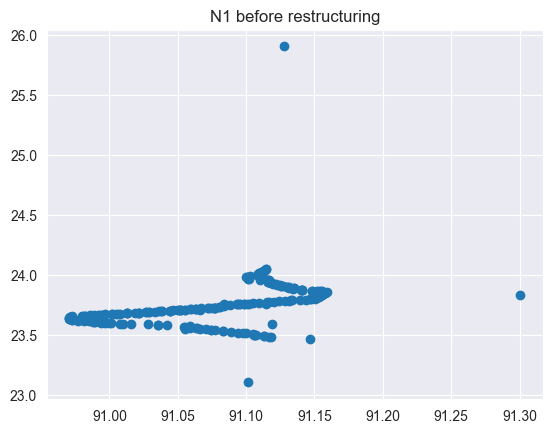

In [13]:
N1 = df_rds[df_rds['road'] == 'N102']
plt.scatter(N1['lon'], N1['lat'])
plt.title('N1 before restructuring')
plt.show()

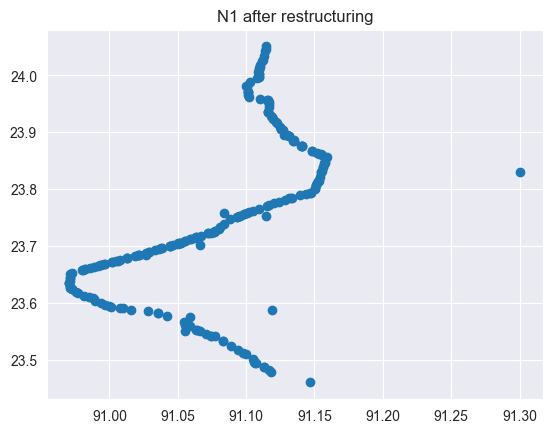

In [14]:
#plot the N1 by longitude and latitude
N1_clean = roads_1[roads_1['road'] == 'N102']
plt.scatter(N1_clean['lon'], N1_clean['lat'])
plt.title('N1 after restructuring')
plt.show()